# 1. Przegląd, analiza oraz wyczyszczenie/uzupełnienie danych. 

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data_path = [os.getcwd()]
player_data = pd.read_csv(os.sep.join(data_path + ['tennis_atp/data/atp_players.csv']))
atp_rank = pd.read_csv(os.sep.join(data_path + ['tennis_atp/data/atp_rankings_current.csv']))
match_data_2003 = pd.read_csv(os.sep.join(data_path + ['tennis_atp/data/atp_matches_2003.csv']))
match_data_2023 = pd.read_csv(os.sep.join(data_path + ['tennis_atp/data/atp_matches_2023.csv']))

### Przegląd danych 

In [9]:
player_data.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [10]:
atp_rank.head()

,ranking_date,rank,player,points
0,20240101,1,104925,11245
1,20240101,2,207989,8855
2,20240101,3,106421,7600
3,20240101,4,206173,6490
4,20240101,5,126094,4805


In [11]:
match_data.head()

NameError: name 'match_data' is not defined

In [12]:
atp_players = pd.merge(atp_rank, player_data, left_on='player', right_on='player_id')

In [13]:
atp_players.head()

,ranking_date,rank,player,points,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,20240101,1,104925,11245,104925,Novak,Djokovic,R,19870522.0,SRB,188.0,Q5812
1,20240108,1,104925,11055,104925,Novak,Djokovic,R,19870522.0,SRB,188.0,Q5812
2,20240115,1,104925,11055,104925,Novak,Djokovic,R,19870522.0,SRB,188.0,Q5812
3,20240129,1,104925,9855,104925,Novak,Djokovic,R,19870522.0,SRB,188.0,Q5812
4,20240205,1,104925,9855,104925,Novak,Djokovic,R,19870522.0,SRB,188.0,Q5812


In [14]:
#Plik zawiera dane z rankingami dla różnych dat. W dalszej części zostanie wykorzystany najświeższy 
#(na ten moment) ranking

In [15]:
top_players = atp_players[atp_players['ranking_date'] == 20240527]
top_players = top_players[top_players['rank'] < 151]
top_players = top_players.sort_values('rank')

In [16]:
top_players.head()

,ranking_date,rank,player,points,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
16,20240527,1,104925,9960,104925,Novak,Djokovic,R,19870522.0,SRB,188.0,Q5812
67,20240527,2,206173,8770,206173,Jannik,Sinner,R,20010816.0,ITA,188.0,Q54812588
33,20240527,3,207989,7300,207989,Carlos,Alcaraz,R,20030505.0,ESP,185.0,Q85518537
118,20240527,4,100644,6305,100644,Alexander,Zverev,R,19970420.0,GER,198.0,Q13990552
50,20240527,5,106421,6295,106421,Daniil,Medvedev,R,19960211.0,RUS,198.0,Q21622022


In [17]:
top_players.isnull().sum()

ranking_date     0
rank             0
player           0
points           0
player_id        0
name_first       0
name_last        0
hand             0
dob              0
ioc              0
height          23
wikidata_id     17
dtype: int64

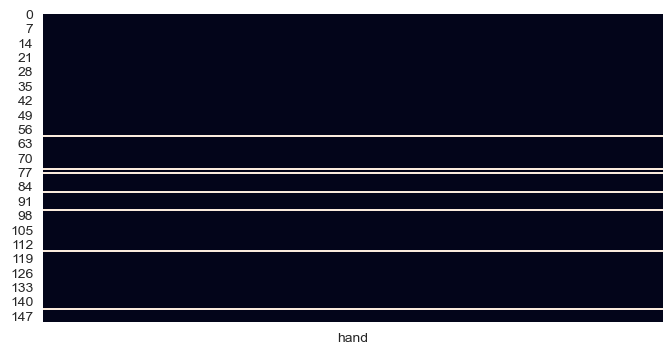

In [18]:
U_values = top_players['hand'] == 'U'
U_values_numeric = U_values.astype(int)
U_values_matrix = U_values_numeric.values.reshape(-1, 1)
U_values_df = pd.DataFrame(U_values_matrix, columns=['hand'])
plt.figure(figsize=(8, 4))
sns.heatmap(U_values_df, cbar=False)
plt.show()

In [19]:
U_values = top_players[top_players['hand'] == 'U']
selected_columns = ['rank', 'player', 'hand', 'name_first', 'name_last']
print(U_values.loc[:, ['name_first', 'name_last', 'hand']])

        name_first   name_last hand
1648          Alex   Michelsen    U
2838         Jakub      Mensik    U
1206         Rinky    Hijikata    U
1869    Aleksandar   Kovacevic    U
2991          Adam      Walton    U
4759      Valentin    Vacherot    U
3127  Roman Andres  Burruchaga    U


In [20]:
# Uzupełnienie brakujących wartości hand rzeczywistymi wartościami
top_players.loc[1648, 'hand'] = 'R'
top_players.loc[2838, 'hand'] = 'R'
top_players.loc[1206, 'hand'] = 'R'
top_players.loc[1869, 'hand'] = 'R'
top_players.loc[2991, 'hand'] = 'R'
top_players.loc[4759, 'hand'] = 'R'
top_players.loc[3127, 'hand'] = 'R'

<Axes: xlabel='hand', ylabel='count'>

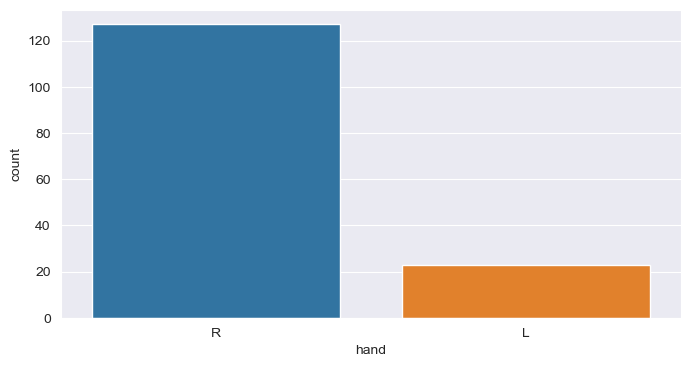

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x = 'hand', data = top_players)

In [22]:
counts = top_players['hand'].value_counts(normalize=True) * 100
print(counts)

hand
R    84.666667
L    15.333333
Name: proportion, dtype: float64


In [23]:
match_data_2003.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1977
winner_entry          2864
winner_name              0
winner_hand              0
winner_ht              109
winner_ioc               0
winner_age               0
loser_id                 0
loser_seed            2518
loser_entry           2582
loser_name               0
loser_hand               0
loser_ht               180
loser_ioc                0
loser_age                0
score                    0
best_of                  0
round                    0
minutes                412
w_ace                  409
w_df                   409
w_svpt                 409
w_1stIn                409
w_1stWon               409
w_2ndWon               409
w_SvGms                409
w_bpSaved              409
w_bpFaced              409
l_ace                  409
l

In [24]:
match_data_2023.isnull().sum()

tourney_id               0
tourney_name             0
surface                 53
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1736
winner_entry          2513
winner_name              0
winner_hand              0
winner_ht              204
winner_ioc               0
winner_age               1
loser_id                 0
loser_seed            2217
loser_entry           2291
loser_name               0
loser_hand               0
loser_ht               336
loser_ioc                0
loser_age                7
score                    0
best_of                  0
round                    0
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced              171
l_ace                  171
l

In [25]:
match_data_2003.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2003-1536,Madrid Masters,Hard,48,M,20031013,1,101965,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1090.0,42.0,865.0
1,2003-1536,Madrid Masters,Hard,48,M,20031013,2,102358,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,146.0,258.0,40.0,950.0
2,2003-1536,Madrid Masters,Hard,48,M,20031013,3,102998,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,57.0,660.0,43.0,855.0
3,2003-1536,Madrid Masters,Hard,48,M,20031013,4,102610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,1170.0,22.0,1190.0
4,2003-1536,Madrid Masters,Hard,48,M,20031013,5,102374,NaN,WC,...,NaN,NaN,NaN,NaN,NaN,NaN,127.0,290.0,49.0,788.0


In [26]:
match_data_2003['w_1stIn'].mean()

46.21680313278747

In [27]:
match_data_2023['w_1stIn'].mean()

50.10088809946714